In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data_store = pd.read_csv("stores_data_set.csv")
data_feature = pd.read_csv("features_data_set.csv",parse_dates=["Date"])
data_sales = pd.read_csv("sales_data_set.csv",parse_dates=["Date"])

In [7]:
print(data_store.info())
print(data_store.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


In [8]:
print(data_feature.info())
print(data_feature.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   


In [9]:
print(data_sales.info())
print(data_sales.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False


In [21]:
data_date = data_feature.groupby("Date").agg({"Temperature":"mean"
                                            ,"Fuel_Price":"mean"
                                            ,"IsHoliday":"sum"
                                            ,"CPI":"mean"
                                           ,"Unemployment":"mean"})
data_date = data_date.sort_index()
temp_date_data = data_date[:'2012-12-10']

data_sales_date = data_sales.groupby("Date").agg({"Weekly_Sales":"sum"})
data_sales_date.sort_index(inplace=True)
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales/1000000
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales.apply(int)
data = pd.merge(data_sales_date, temp_date_data, left_index=True,right_index=True, how='left')
data["IsHoliday"] = data["IsHoliday"] > 0

In [23]:
print(data.describe())

       Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment
count    143.000000    95.000000   95.000000   95.000000     95.000000
mean      46.601399    60.171579    3.352644  171.538614      7.999315
std        5.399713    15.449706    0.434842    3.088921      0.488028
min       39.000000    30.480889    2.672067  167.546485      6.953711
25%       44.000000    47.266000    2.863000  168.379190      7.508333
50%       46.000000    60.890889    3.487400  171.386189      8.150133
75%       47.000000    74.669778    3.708267  174.604988      8.428578
max       80.000000    81.580222    3.997778  176.652613      8.619311


<Axes: title={'center': 'Unemployment'}, xlabel='Date'>

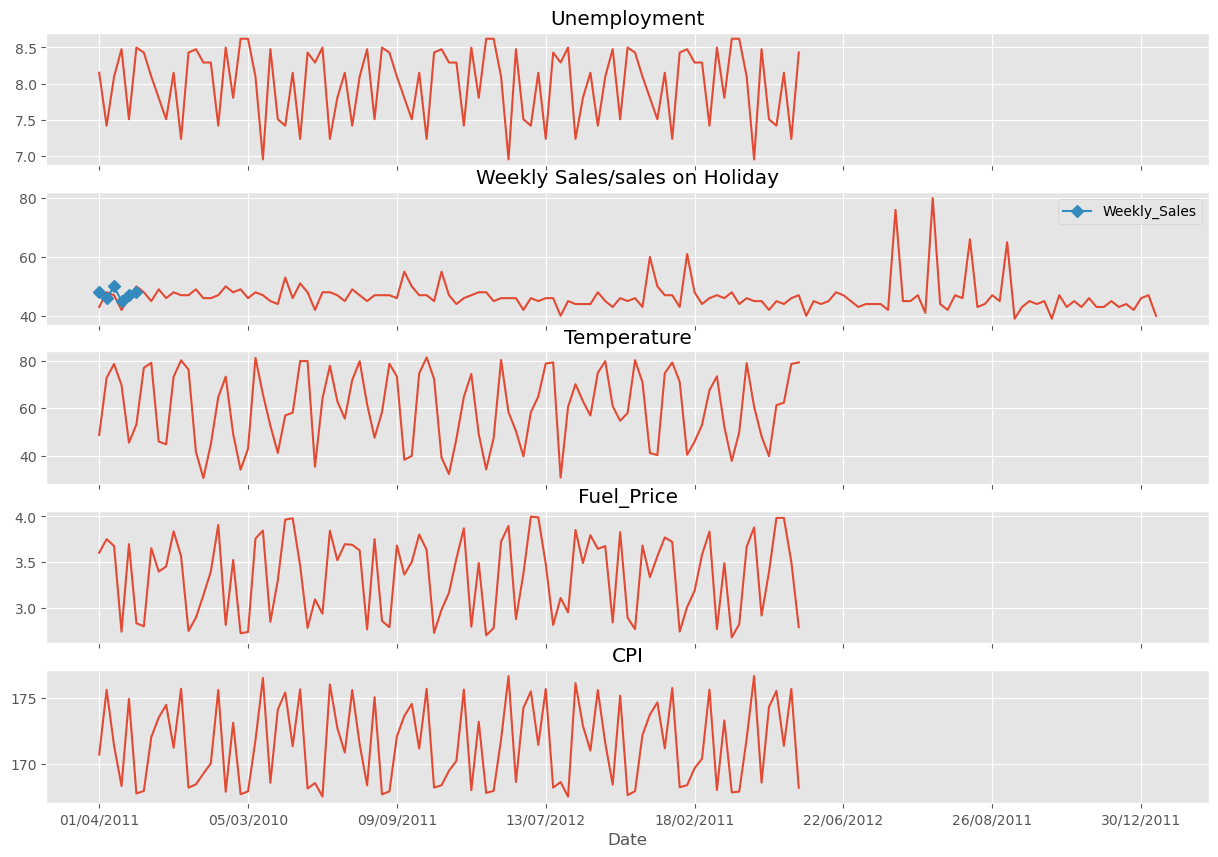

In [13]:
plt.style.use('ggplot')
fig, ax = plt.subplots(5,1,figsize=(15,10),sharex=True) 
data["Weekly_Sales"].plot(ax=ax[1],title="Weekly Sales/sales on Holiday")
data[data.IsHoliday==True]["Weekly_Sales"].plot(marker="D",ax=ax[1],legend="Holiday Week sale")
data["Temperature"].plot(ax=ax[2], title="Temperature")
data["Fuel_Price"].plot(ax=ax[3],title="Fuel_Price")
data["CPI"].plot(ax=ax[4],title="CPI")
data["Unemployment"].plot(ax=ax[0],title="Unemployment")

<Axes: >

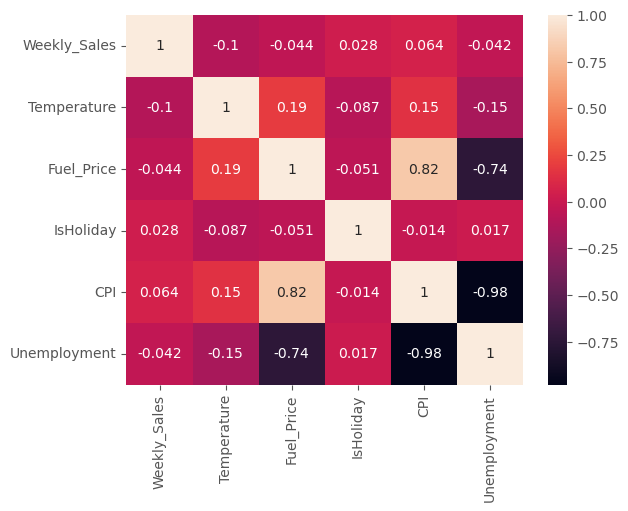

In [14]:
sns.heatmap(data.corr(),annot=True)

In [98]:
print(data.columns)

Index(['Weekly_Sales', 'Temperature', 'Fuel_Price', 'IsHoliday', 'CPI',
       'Unemployment'],
      dtype='object')


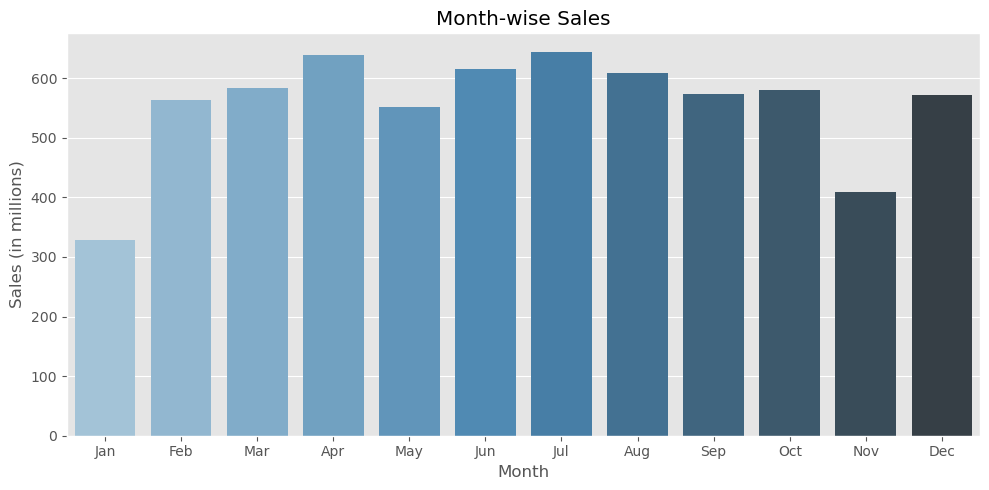

In [99]:
import calendar
data.index = pd.to_datetime(data.index, dayfirst=True)

data_sales_month = data.groupby(data.index.month).agg({"Weekly_Sales": "sum"})

data_sales_month.index = data_sales_month.index.map(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(10, 5))
sns.barplot(x=data_sales_month.index, y=data_sales_month.Weekly_Sales, palette="Blues_d")
plt.title("Month-wise Sales")
plt.xlabel("Month")
plt.ylabel("Sales (in millions)")
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Sales')

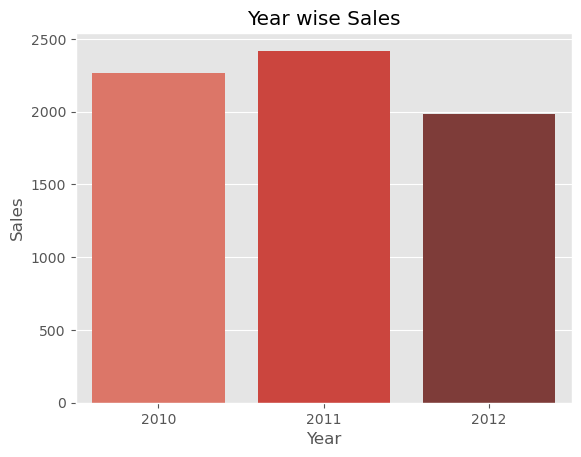

In [30]:
data_sales_year = data.groupby(data.index.year).agg({"Weekly_Sales":"sum"})

sns.barplot(x=data_sales_year.index,y=data_sales_year.Weekly_Sales,  palette="Reds_d")
plt.title("Year wise Sales")
plt.xlabel("Year")
plt.ylabel("Sales")

In [33]:
data_Store = data_feature.groupby("Store").agg({"Temperature":"mean","Fuel_Price":"mean","IsHoliday":"sum"})
temp_store = data_sales.groupby("Store").agg({"Weekly_Sales":"sum"})
temp_store.Weekly_Sales = temp_store.Weekly_Sales/1000000
temp_store.Weekly_Sales = temp_store.Weekly_Sales.apply(int)
data_Store.set_index(np.arange(0,45),inplace=True)
data_store["temp"] = data_Store.Temperature
data_store["Fuel_Price"] = data_Store.Fuel_Price
data_store["holiday"] = data_Store.IsHoliday
data_store["Weekly_Sales"] = temp_store.Weekly_Sales
data_store.describe()

,Store,Size,temp,Fuel_Price,holiday,Weekly_Sales
count,45.000000,45.000000,45.000000,45.000000,45.0,44.000000
mean,23.000000,130287.600000,59.356198,3.405992,13.0,150.090909
std,13.133926,63825.271991,9.956122,0.153935,0.0,78.780478
min,1.000000,34875.000000,37.921264,3.245945,13.0,37.000000
25%,12.000000,70713.000000,51.866319,3.259242,13.0,78.500000
50%,23.000000,126512.000000,58.107912,3.328764,13.0,140.500000
75%,34.000000,202307.000000,68.504670,3.497874,13.0,200.750000
max,45.000000,219622.000000,75.438077,3.643654,13.0,301.000000


C:\Users\ACER\AppData\Local\Temp\ipykernel_19644\1020390512.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=data_store, y="Size", x="Type", ax=ax[1], palette="coolwarm_r")


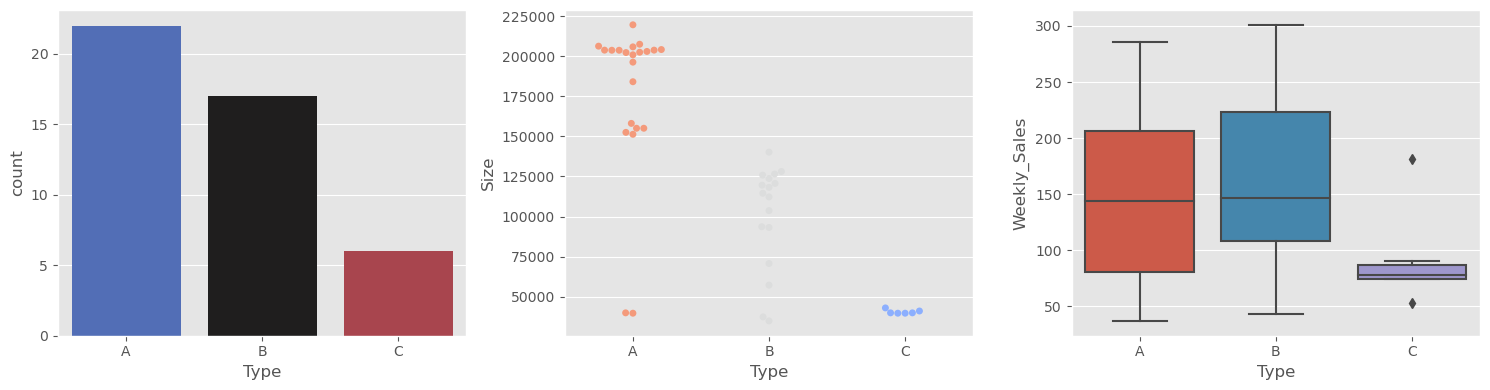

In [35]:
data_store['Weekly_Sales'] = pd.to_numeric(data_store['Weekly_Sales'], errors='coerce')

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
sns.countplot(x='Type', data=data_store, ax=ax[0], palette='icefire')
sns.swarmplot(data=data_store, y="Size", x="Type", ax=ax[1], palette="coolwarm_r")
sns.boxplot(data=data_store, y="Weekly_Sales", x="Type", ax=ax[2])

plt.tight_layout()
plt.show()

In [36]:
len(data_sales["Dept"].unique())

81

In [37]:
data_Dept = data_sales.groupby("Dept").agg({"Weekly_Sales":"sum"})
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales/10000
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales.apply(int)
data_Dept.sort_values(by="Weekly_Sales")

,Weekly_Sales
Dept,
39,0
78,0
43,0
47,0
51,3
...,...
90,29106
72,30572
38,39311


Text(0.5, 0, 'Department')

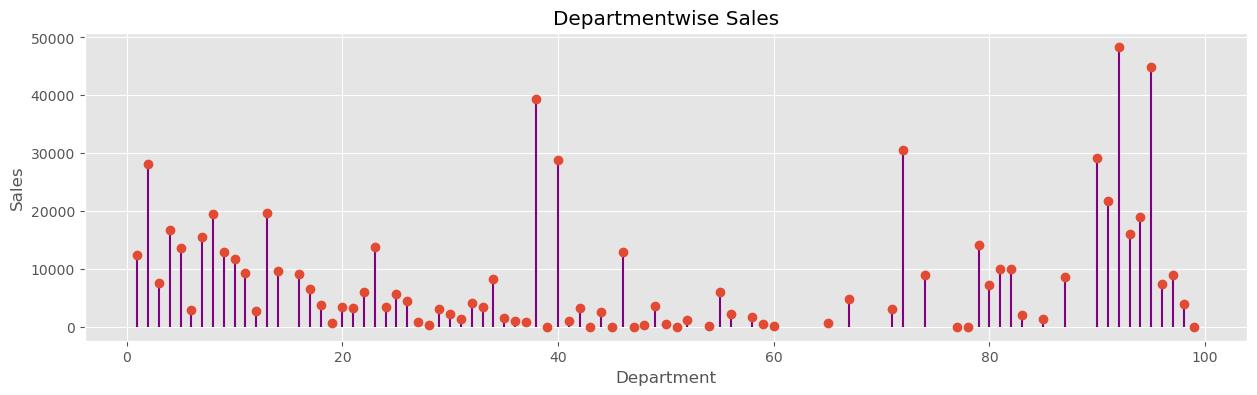

In [38]:
fig1, ax1 = plt.subplots(figsize=(15, 4))
plt.vlines(x=data_Dept.index, ymin=0, ymax=data_Dept['Weekly_Sales'], color='purple')
plt.plot(data_Dept.index,data_Dept['Weekly_Sales'], "o", )
plt.title("Departmentwise Sales")
plt.ylabel("Sales")
plt.xlabel("Department")

In [40]:
# Merge data
sales_date_store = data_sales.groupby(["Date","Store"]).agg({"Weekly_Sales":"sum"})
sales_date_store.sort_index(inplace=True)
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales / 10000
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales.apply(int)

data_table = pd.merge(data_feature, sales_date_store, how='left', on=["Date", "Store"])
data_table = pd.merge(data_table, data_store[["Store", "Type"]], how='left', on="Store")

data_table['Date'] = pd.to_datetime(data_table['Date'], dayfirst=True)
data_train = data_table[data_table.Weekly_Sales.notnull()]
data_test = data_table[data_table.Weekly_Sales.isnull()]

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

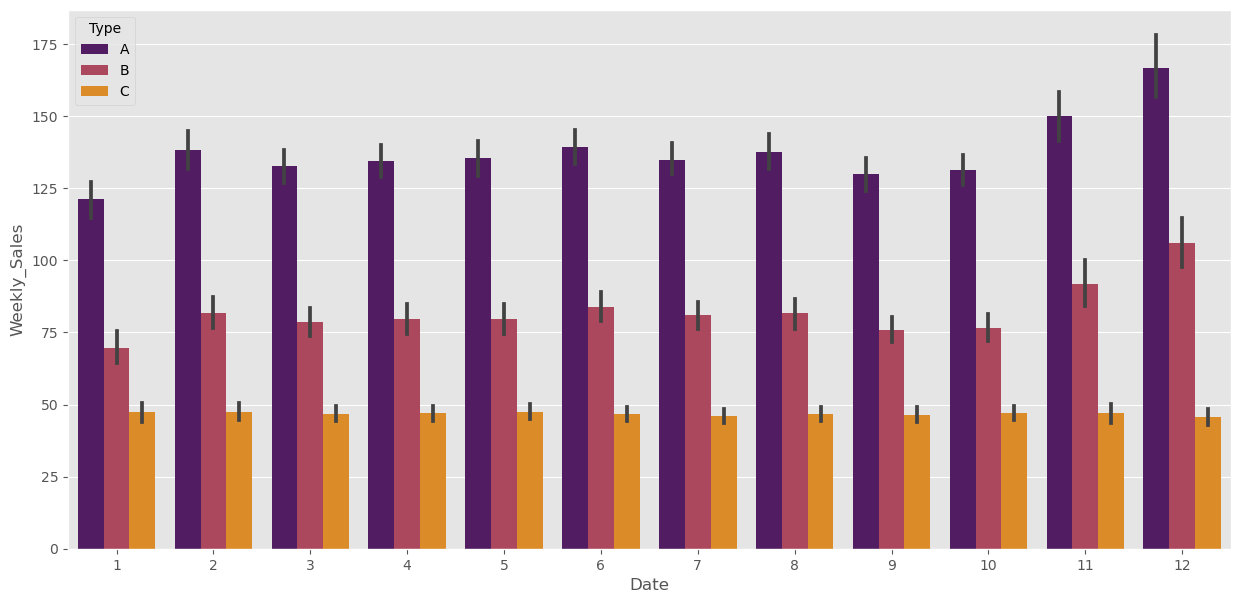

In [41]:
plt.figure(figsize=(15, 7))
sns.barplot(x=data_train.Date.dt.month, y=data_train.Weekly_Sales,hue=data_train.Type, palette= "inferno")

In [44]:
!pip install fancyimpute


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for cvxpy from https://files.pythonhosted.org/packages/11/3f/9f58f7e6537b35c10b5de30a3d6496f765e65ede72fa35db3ac76512e1f0/cvxpy-1.6.5-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cvxopt from https://files.pythonhosted.org/packages/a3/52/2237d72cf007e6c36367ab8a776388a9f13511e4cfa8a71b79101ad6e0fa/cvxopt-1.3.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for nose from https://files.pythonhosted.org/packages/15/d8/dd071918c040f50fa1cf80da16423af51ff8ce4a0f2399b7bf8de45ac3d9/nose-1.3.7-py3-none-any.whl.metadata
  Obtaining dependency information for osqp>=0.6.2 from https://files.pythonhosted.org/packages/a1/85/19e2b49117f7ea20d94129d67c9b982e788ded90c561e0029c42fc7eb0ea/osqp-1.0.4-cp311-cp311-win_amd

In [48]:
!pip install xgboost



  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/5e/03/15cd49e855c62226ecf1831bbe4c8e73a4324856077a23c495538a36e557/xgboost-3.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 435.7 kB/s eta 0:05:45
   ---------------------------------------- 0.1/150.0 MB 751.6 kB/s eta 0:03:20
   ---------------------------------------- 0.2/150.0 MB 1.3 MB/s eta 0:02:00
   ---------------------------------------- 0.4/150.0 MB 1.9 MB/s eta 0:01:19
   ---------------------------------------- 0.6/150.0 MB 2.4 MB/s eta 0:01:03
   ---------------------------------------- 0.9/150.0 MB 3.0 MB/s eta 0:00:51
   ---------------------------------------- 1.2/150.0 MB 3.4 MB/s eta 0:00:44
   ---------------------------------------- 1.6/150.0 MB 4.0 MB/s eta 0:00:37
   ----------------------

In [50]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/5e/23/f8b28ca248bb629b9e08f877dd2965d1994e1674a03d67cd10c5246da248/lightgbm-4.6.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.5 MB 812.7 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.5 MB 980.4 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.5 MB 1.2 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.5 MB 1.3 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.5 MB 1.4 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.5 MB 1.5 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.5 MB 1.5 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.5 MB 1.6 MB/s eta 0:00:01
   ------------------- --------------------

In [51]:
from fancyimpute import IterativeImputer
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, Lasso, RidgeCV,LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

In [52]:
def createdummies(data,cols):
    for col in cols:
        one_hot = pd.get_dummies(data[col],prefix=col)
        data = data.join(one_hot)
        data.drop(col,axis = 1,inplace=True)
    
    return data

In [53]:
itt = IterativeImputer()
df = itt.fit_transform(data_table[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]]) 
data_table.MarkDown1 = df[:,0]
data_table.MarkDown2 = df[:,1]
data_table.MarkDown3 = df[:,2]
data_table.MarkDown4 = df[:,3]
data_table.MarkDown5 = df[:,4]

data_table['CPI'].fillna((data_table['CPI'].mean()), inplace=True)
data_table['Unemployment'].fillna((data_table['Unemployment'].mean()), inplace=True)
data_table['IsHoliday'] = data_table['IsHoliday'].map({True:0,False:1})

pd.to_datetime(data_table['Date'])
data_table["Month"] = data_table.Date.dt.month
data_table["Year"] = data_table.Date.dt.year
data_table.head()
data_table.drop(['Date'],axis=1,inplace= True)
data_table = createdummies(data_table,["Type","Month","Year"])

In [54]:
data_table.columns

Index(['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Weekly_Sales', 'Type_A', 'Type_B', 'Type_C', 'Month_1',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2010',
       'Year_2011', 'Year_2012', 'Year_2013'],
      dtype='object')

In [55]:
data_train = data_table[data_table.Weekly_Sales.notnull()]
data_test = data_table[data_table.Weekly_Sales.isnull()]
X = data_train.drop('Weekly_Sales', axis=1)
y = data_train['Weekly_Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [56]:
classifiers = [
    LinearRegression(),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    Lasso(alpha =16, random_state=100),
    ElasticNet(alpha=0.8),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    SVR(), 
    LinearSVR(), 
    xgb.XGBRegressor(),
    lgb.LGBMRegressor()
    ]

name = []
score = []
models = []
rmse = []
i = 0
for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    name.append(type(classifier).__name__)
    score.append(classifier.score(X_test, y_test))
    models.append(classifier)
    rmse.append(np.sqrt(mean_squared_error(classifier.predict(X_test), y_test)))

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000935 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2371
[LightGBM] [Info] Number of data points in the train set: 4504, number of used features: 29
[LightGBM] [Info] Start training from score 104.274201


In [57]:
df_score = pd.DataFrame(list(zip(name,rmse, score, models)),columns=['name','rmse','score',"model"])
df_score.set_index('name',inplace=True)
df_score.sort_values(by=['score'], ascending= False,inplace=True)
df_score

,rmse,score,model
name,,,
XGBRegressor,10.267844,0.966571,"XGBRegressor(base_score=None, booster=None, ca..."
LGBMRegressor,11.040041,0.961354,LGBMRegressor()
RandomForestRegressor,13.034006,0.946134,"(DecisionTreeRegressor(max_features=1.0, rando..."
DecisionTreeRegressor,16.333779,0.915407,DecisionTreeRegressor()
GradientBoostingRegressor,16.670848,0.911880,([DecisionTreeRegressor(criterion='friedman_ms...
AdaBoostRegressor,32.426522,0.666603,"(DecisionTreeRegressor(max_depth=3, random_sta..."
RidgeCV,40.618775,0.476863,"RidgeCV(alphas=[0.001, 0.01, 0.1, 1])"
LinearRegression,40.619721,0.476839,LinearRegression()
ElasticNet,43.819407,0.391172,ElasticNet(alpha=0.8)


In [58]:
model = df_score.loc["XGBRegressor","model"]
predict = model.predict(X_test)
predict

array([142.18391 , 143.56573 , 137.61087 , ...,  87.32868 ,  53.13925 ,
        71.597176], dtype=float32)

In [103]:
X_test = X_test.drop('Predicted_Demand', axis=1)
X_test.columns

Index(['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type_A', 'Type_B', 'Type_C', 'Month_1', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2010', 'Year_2011',
       'Year_2012', 'Year_2013'],
      dtype='object')

In [69]:
print(data_table.columns)

Index(['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Weekly_Sales', 'Type_A', 'Type_B', 'Type_C', 'Month_1',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2010',
       'Year_2011', 'Year_2012', 'Year_2013'],
      dtype='object')


In [72]:
print(X_test.shape)

(1931, 30)


In [73]:
predicted_demand = model.predict(X_test)  
print(len(predicted_demand)) 

1931


In [74]:
X_test['Predicted_Demand'] = predicted_demand
result = pd.merge(X_test, data_sales[['Store', 'Weekly_Sales']], on='Store', how='left')
print(result[['Store', 'Predicted_Demand', 'Weekly_Sales']])

          Store  Predicted_Demand  Weekly_Sales
0            41        142.183914      16971.05
1            41        142.183914      30204.01
2            41        142.183914      20694.24
3            41        142.183914      12816.16
4            41        142.183914      15154.51
...         ...               ...           ...
18121504     45         71.597176        508.37
18121505     45         71.597176        628.10
18121506     45         71.597176       1061.02
18121507     45         71.597176        760.01
18121508     45         71.597176       1076.80

[18121509 rows x 3 columns]


In [100]:
print(X_test.shape[0])  
print(len(predicted_demand)) 


1931
1


In [102]:
model = df_score.loc["XGBRegressor", "model"]

custom_input = {
    'Store': [1],
    'Temperature': [72.5],  
    'Fuel_Price': [3.15],
    'MarkDown1': [0.0], 
    'MarkDown2': [0.0],
    'MarkDown3': [0.0], 
    'MarkDown4': [0.0], 
    'MarkDown5': [0.0], 
    'CPI': [200.0],  
    'Unemployment': [5.5], 
    'IsHoliday': [0], 
    'Type_A': [1],  
    'Type_B': [0], 
    'Type_C': [0], 
    
    # for months
    'Month_1': [0],
    'Month_2': [0], 
    'Month_3': [1],  
    'Month_4': [0],  
    'Month_5': [0],
    'Month_6': [0],
    'Month_7': [0],  
    'Month_8': [0], 
    'Month_9': [0], 
    'Month_10': [0], 
    'Month_11': [0],
    'Month_12': [0], 
    
    # for years
    'Year_2010': [1],  
    'Year_2011': [0],
    'Year_2012': [0], 
    'Year_2013': [0], 
}

custom_input_df = pd.DataFrame(custom_input)

custom_input_df = custom_input_df[['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 
                                   'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
                                   'IsHoliday', 'Type_A', 'Type_B', 'Type_C', 'Month_1', 'Month_2', 
                                   'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 
                                   'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2010', 
                                   'Year_2011', 'Year_2012', 'Year_2013']]

predicted_demand = model.predict(custom_input_df)
sales_in_millions = actual_sales / 1_000_000
actual_sales = predicted_value * 1_000_000
sales_in_millions = actual_sales / 1_000_0000
print(f"Predicted Sales Next Week: {sales_in_millions:.1f} million USD")


Predicted Sales Next Week: 19.0 million USD
